In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as time
import functions as f


def calculate_and_solve(framework_input):
	framework=framework_input.copy()
	### calculate each position array###
	v_poss=self.list_verticle_framework(framework)
	h_poss=f.list_horizontal_framework(framework)
	b_poss=f.list_box_framework(framework)
	framework_with_positional_element = f.generate_positional_array(framework)
	### solve ####
	status,remain_possible=f.solve(framework_with_positional_element,framework,1,v_poss,h_poss,b_poss)
	return [framework,status,remain_possible]

def solve_multiple_times(new_sudoku_input,times,need_conversion=1):
	new_sudoku=new_sudoku_input.copy()
	#print(f"input sudoku is {new_sudoku}")
	### convert into 3,3,3,3 dimension###
	if need_conversion==1:
		sudoku=f.create_framework(new_sudoku)
	else:
		sudoku = new_sudoku
	#print(f"new sudoku is {sudoku}")
	for i in range(times):
		sudoku,status,remain_possible=calculate_and_solve(sudoku)
		if status == 0 : return {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}
	return {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}

def guess(final_sudoku_original,index=0,hindex=0):
    final_sudoku=final_sudoku_original.copy()
    #first_position=final_sudoku['sudoku'][final_sudoku['remaining']['position'][0][0],final_sudoku['remaining']['position'][0][1],final_sudoku['remaining']['position'][0][2],final_sudoku['remaining']['position'][0][3]]
    #print(f'the first position is {first_position}')
    possible=final_sudoku['remaining']['possible_num'][hindex]
    #print(f'from guess,the possible values are {possible}')
    if (len(possible)<10):
        final_sudoku['sudoku'][final_sudoku['remaining']['position'][hindex][0],final_sudoku['remaining']['position'][hindex][1],final_sudoku['remaining']['position'][hindex][2],final_sudoku['remaining']['position'][hindex][3]]=possible[index]
#         print(f"guess {possible[index]} at position {final_sudoku['remaining']['position'][hindex]}")
    else:
        print('there are too many possibilities')
    #print(first_position,possible)
    ### clear variables before return
    del final_sudoku['loops'];del final_sudoku['remaining']
    return final_sudoku

def solve_complex(final_sudoku1,loops=10,hindex=0): # hindex is index of unfound digit to solve
    final_sudoku=final_sudoku1.copy()
    loopcount=0
    sudoku_solution=[]
    sudokuarray=[]
    while (final_sudoku['status']==1 and loopcount<loops):
          for index,j in enumerate(final_sudoku['remaining']['possible_num'][hindex]):
#               print(f"from solve_complex, possible values are {final_sudoku['remaining']['possible_num'][hindex]} the index is {index}")
    #           print(f"guess new sudoku {guess(final_sudoku,index=index)['sudoku']}")
              sudokuarray.append(solve_multiple_times(guess(final_sudoku,index=index,hindex=hindex)['sudoku'],10,need_conversion=0))
          for sudoku in sudokuarray:
              if sudoku['status'] == 0:
#                     print('sudoku is solved')
                    final_sudoku=sudoku
                    sudoku_solution.append(sudoku.copy())
              elif sudoku['status'] == 1:
#                     print('continue solving')
                    final_sudoku=sudoku
          loopcount+=1
    return [sudoku_solution,loopcount]

    

In [3]:
## specify variables
t0=time.now()
difficulty=0.5
times=2
guesses=100
### generate sudoku ####
new_sudoku=f.generate_sudoku(difficulty)
loopcount=0
##first solution
final_sudoku=solve_multiple_times(new_sudoku,times)
##next solution
# sudoku_solution,loopcount=solve_complex(final_sudoku,hindex=0)
##all solutions
sudoku_solutions=[]
if final_sudoku['status']==1:
    for i in range(len(final_sudoku['remaining'])):
        sudoku_solution,loopcounti=solve_complex(final_sudoku,hindex=i,loops=guesses)
        sudoku_solutions.extend(sudoku_solution)
        loopcount+=loopcounti
elif final_sudoku['status']==0:
    sudoku_solutions.append(final_sudoku)

#### save to file ####
np.save("solved", sudoku_solutions)
print(f'final time is {(time.now()-t0).total_seconds()*1000} ms after {loopcount} guesses. {len(sudoku_solutions)} solutions found')

Answer:
 [[9 5 4 8 6 7 3 1 2]
 [2 8 3 1 4 5 6 9 7]
 [7 1 6 3 9 2 4 8 5]
 [4 9 8 7 5 3 2 6 1]
 [6 3 1 2 8 4 7 5 9]
 [5 7 2 6 1 9 8 3 4]
 [3 2 9 5 7 6 1 4 8]
 [8 4 7 9 3 1 5 2 6]
 [1 6 5 4 2 8 9 7 3]]

Masked answer:
 [[0 0 0 0 0 0 3 1 0]
 [2 0 0 1 4 5 6 0 0]
 [0 1 6 0 9 0 0 0 5]
 [4 9 8 7 5 0 0 0 1]
 [6 0 1 0 8 4 0 0 0]
 [0 0 2 0 0 9 0 0 0]
 [0 2 0 0 0 6 0 4 0]
 [0 0 7 0 3 1 5 2 0]
 [0 6 5 4 0 0 9 7 0]]
sudoku is solved
sudoku is solved
sudoku is solved
final time is 1926.125 ms after 2 guesses. 3 solutions found


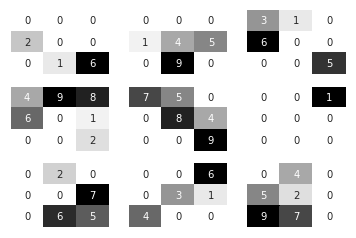

In [4]:
f.plot(np.load('puzzle.npy'))

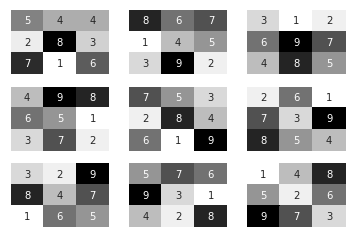

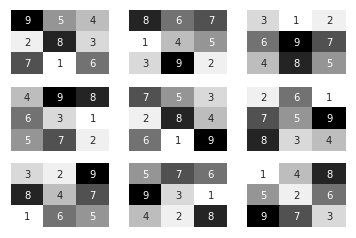

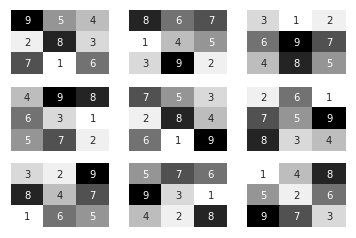

In [5]:
sudoku_solutions=np.load('solved.npy')
if len(sudoku_solutions) <10:
    for sudoku_solution in sudoku_solutions:
        f.plot(sudoku_solution['sudoku'])
else:
    for i in range(10):
        f.plot(sudoku_solutions[i]['sudoku'])

In [62]:
sudoku_solutions=np.load('solved.npy')
len(sudoku_solutions)

2

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as time
import pandas as pd
import functions as f
import seaborn as sns

class Sudoku():
    '''Create and solve a sudoku puzzle'''
    def __init__(self, 
                 difficulty=0.5, 
                 times=2, 
                 guesses=100):
        '''Set initial variables for creating the puzzle'''
        self.difficulty = difficulty
        self.times = times
        self.guesses = guesses
        self.sudoku = self.generate_sudoku(difficulty)
        
    def generate_sudoku(self, mask_rate=0.7):
        '''generate a new sudoku puzzle'''
        while True:
            n = 9
            m = np.zeros((n, n), np.int)
            rg = np.arange(1, n + 1)
            m[0, :] = np.random.choice(rg, n, replace=False)
            try:
                for r in range(1, n):
                    for c in range(n):
                        col_rest = np.setdiff1d(rg, m[:r, c])
                        row_rest = np.setdiff1d(rg, m[r, :c])
                        avb1 = np.intersect1d(col_rest, row_rest)
                        sub_r, sub_c = r//3, c//3
                        avb2 = np.setdiff1d(np.arange(0, n+1), m[sub_r*3:(sub_r+1)*3, sub_c*3:(sub_c+1)*3].ravel())
                        avb = np.intersect1d(avb1, avb2)
                        m[r, c] = np.random.choice(avb, size=1)
                break
            except ValueError:
                pass
        print("Answer:\n", m)
        mm = m.copy()
        mm[np.random.choice([True, False], size=m.shape, p=[mask_rate, 1 - mask_rate])] = 0
        print("\nMasked answer:\n", mm)
        np.save("puzzle", self.create_framework(mm))
        return mm

    def calculate_and_solve(self,framework_input):
        framework=framework_input.copy()
        ### calculate each position array###
        v_poss=self.list_verticle_framework(framework)
        h_poss=self.list_horizontal_framework(framework)
        b_poss=self.list_box_framework(framework)
        framework_with_positional_element = self.generate_positional_array(framework)
        ### solve ####
        status,remain_possible=self.solve(framework_with_positional_element,framework,1,v_poss,h_poss,b_poss)
        return [framework,status,remain_possible]

    def solve_multiple_times(self,sudoku,times,need_conversion=1):
        '''wrapper for solve function solve function
        input 
        sudoku.solve_multimple_times(times,need conversion?)
        
        returns a dictionary
        {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}
        '''
        new_sudoku=sudoku.copy()
        #print(f"input sudoku is {new_sudoku}")
        ### convert into 3,3,3,3 dimension###
        if need_conversion==1:
            sudoku=self.create_framework(new_sudoku)
        else:
            sudoku = new_sudoku
        #print(f"new sudoku is {sudoku}")
        for i in range(times):
            sudoku,status,remain_possible=self.calculate_and_solve(sudoku)
            if status == 0 : return {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}
        return {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}

    def guess(self,final_sudoku_original,index=0,hindex=0):
        final_sudoku=final_sudoku_original.copy()
        #first_position=final_sudoku['sudoku'][final_sudoku['remaining']['position'][0][0],final_sudoku['remaining']['position'][0][1],final_sudoku['remaining']['position'][0][2],final_sudoku['remaining']['position'][0][3]]
        #print(f'the first position is {first_position}')
        possible=final_sudoku['remaining']['possible_num'][hindex]
        #print(f'from guess,the possible values are {possible}')
        if (len(possible)<10):
            final_sudoku['sudoku'][final_sudoku['remaining']['position'][hindex][0],final_sudoku['remaining']['position'][hindex][1],final_sudoku['remaining']['position'][hindex][2],final_sudoku['remaining']['position'][hindex][3]]=possible[index]
    #         print(f"guess {possible[index]} at position {final_sudoku['remaining']['position'][hindex]}")
        else:
            print('there are too many possibilities')
        #print(first_position,possible)
        ### clear variables before return
        del final_sudoku['loops'];del final_sudoku['remaining']
        return final_sudoku

    def solve_complex(self,final_sudoku1,loops=10,hindex=0): # hindex is index of unfound digit to solve
        final_sudoku=final_sudoku1.copy()
        loopcount=0
        sudoku_solution=[]
        sudokuarray=[]
        while (final_sudoku['status']==1 and loopcount<loops):
              for index,j in enumerate(final_sudoku['remaining']['possible_num'][hindex]):
    #               print(f"from solve_complex, possible values are {final_sudoku['remaining']['possible_num'][hindex]} the index is {index}")
        #           print(f"guess new sudoku {guess(final_sudoku,index=index)['sudoku']}")
                  sudokuarray.append(
                      self.solve_multiple_times(
                          self.guess(
                              final_sudoku,
                              index=index,
                              hindex=hindex)['sudoku'],
                          10,
                          need_conversion=0
                          )
                      )
              for sudoku in sudokuarray:
                  if sudoku['status'] == 0:
    #                     print('sudoku is solved')
                        final_sudoku=sudoku
                        sudoku_solution.append(sudoku.copy())
                  elif sudoku['status'] == 1:
    #                     print('continue solving')
                        final_sudoku=sudoku
              loopcount+=1
        return [sudoku_solution,loopcount]
    
    def create_framework(self,new_sudoku):
        return np.swapaxes(np.swapaxes(new_sudoku.reshape([3,3,3,3]),0,2),1,2)

    def list_possibilities(self,framework):
        possiblelist=[]
        for i in range(1,10):
            if (i not in framework.flatten()):
                possiblelist.append(i)
        return possiblelist

    def list_verticle_framework(self,framework):
        verticleposs=[]
        for i in range(3):
            for j in range(3):
                verticleposs.append(self.list_possibilities(framework[i,:,:,j]))
        return verticleposs

    def list_horizontal_framework(self,framework):
        horizontalposs=[]
        for i in range(3):
            for j in range(3):
                #print (framework[:,i,j,:])
                horizontalposs.append(self.list_possibilities(framework[:,i,j,:]))
        return horizontalposs

    def list_box_framework(self,framework):
        boxposs=[]
        for i in range(3):
            for j in range(3):
                #print (framework[i,j,:,:])
                boxposs.append(self.list_possibilities(framework[i,j,:,:]))
        return boxposs

    def generate_positional_array(self,framework):
        framework_with_positional_element=np.zeros([3,3,3,3,4],dtype=int)
        for indexi,i in enumerate(framework):
            for indexj,j in enumerate(i):
                for indexk,k in enumerate(j):
                    for indexl,l in enumerate(k):
                        #print(l,f'vrow is {3*indexi+indexl} hrow is {3*indexj+indexk} box is {3*indexi+indexj}')
                        framework_with_positional_element[indexi,indexj,indexk,indexl]=[l,3*indexi+indexl,3*indexj+indexk,3*indexi+indexj]
        return framework_with_positional_element

    def solve(self,f,framework,tries,v_poss,h_poss,b_poss):
        count =0
        t0=time.now()
        remaining = 0
        remain_possible={"position":[],"possible_num":[]}
        while True:
            for ii,i in enumerate(f):
                for ij,j in enumerate(i):
                    for ik,k in enumerate(j):
                        for il,l in enumerate(k):
                            #print(l)
                            if l[0]==0:
                                remaining_possibilities=np.intersect1d(np.intersect1d(v_poss[l[1]],h_poss[l[2]]),b_poss[l[3]])
                                #print(remaining_possibilities)
                                if len(remaining_possibilities)==1:
                                    # print (f'replace index {ii}{ij}{ik}{il} with {remaining_possibilities[0]}')
                                    framework[ii,ij,ik,il]=remaining_possibilities[0]
                                    f[ii,ij,ik,il,0]=remaining_possibilities[0]
                                elif (len(remaining_possibilities)==0):
                                    # print('sudoku is not possible')
                                    return [2,None]
                                else:
                                    remaining +=1
                                    remain_possible["possible_num"].append(remaining_possibilities)
                                    remain_possible["position"].append([ii,ij,ik,il])
            count +=1
            if remaining==0:print('sudoku is solved');return [0,remain_possible]
            if count>tries:return [1,remain_possible]
        print(f'sudoku completed after {(time.now()-t0).total_seconds()*1000} ms') if remaining ==0 else print (f'sudoku is still not completed after {(time.now()-t0).total_seconds()*1000} ms')



    def plot(self,framework):
        ''' This function is used to plot the sudoku into a matplotlib chart'''
        data = []
        for i in framework:
            for j in i:
                data.append(pd.DataFrame(j))

        _, axn = plt.subplots(3, 3, sharex=True, sharey=True)

        for axis, dfi in zip(np.swapaxes(axn, 0, 1).flat, data):
            sns.heatmap(dfi, annot=True, ax=axis, cbar=False, cmap='Greys')
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
    def plot_solutions(self):
        sudoku_solutions=np.load('solved.npy')
        if len(sudoku_solutions) <10:
            for sudoku_solution in sudoku_solutions:
                f.plot(sudoku_solution['sudoku'])
        else:
            for i in range(10):
                f.plot(sudoku_solutions[i]['sudoku'])
        plt.show()
    def save_solutions(self, sudoku_solutions):
        np.save("solved", sudoku_solutions)
        print(f'final time is {(time.now()-t0).total_seconds()*1000} \
              ms after {loopcount} guesses. {len(sudoku_solutions)} \
              solutions found')



In [30]:
#generate sudoku
sudoku = Sudoku()

Answer:
 [[5 1 2 8 3 7 9 6 4]
 [8 6 4 1 2 9 7 5 3]
 [7 9 3 6 5 4 2 1 8]
 [1 2 8 9 4 3 5 7 6]
 [4 7 6 5 8 2 3 9 1]
 [3 5 9 7 1 6 4 8 2]
 [9 3 1 4 6 5 8 2 7]
 [2 8 7 3 9 1 6 4 5]
 [6 4 5 2 7 8 1 3 9]]

Masked answer:
 [[5 1 2 0 0 7 0 0 0]
 [0 0 4 0 2 0 7 0 3]
 [7 0 3 6 0 4 2 0 0]
 [1 2 0 9 0 0 5 7 6]
 [4 7 6 0 8 2 3 0 0]
 [0 5 0 0 1 6 4 0 2]
 [0 0 1 4 0 0 0 0 7]
 [2 8 7 3 9 0 0 0 0]
 [0 4 5 2 0 8 1 0 9]]


In [36]:
import datetime
t0=datetime.datetime.now()
loopcount=0
##first solution
final_sudoku=sudoku.solve_multiple_times(sudoku.sudoku,sudoku.times)
##all solutions
sudoku_solutions=[]
if final_sudoku['status']==1:
    for i in range(len(final_sudoku['remaining'])):
        sudoku_solution,loopcounti=sudoku.solve_complex(final_sudoku,hindex=i,loops=sudoku.guesses)
        sudoku_solutions.extend(sudoku_solution)
        loopcount+=loopcounti
elif final_sudoku['status']==0:
    sudoku_solutions.append(final_sudoku)

#### save to file ####
# np.save("solved", sudoku_solutions)
sudoku.save_solutions(sudoku_solutions)
print(f'final time is {(time.now()-t0).total_seconds()*1000} ms after {loopcount} guesses. {len(sudoku_solutions)} solutions found')

sudoku is solved
sudoku is solved
sudoku is solved
final time is 54.132               ms after 2 guesses. 3               solutions found
final time is 54.305 ms after 2 guesses. 3 solutions found


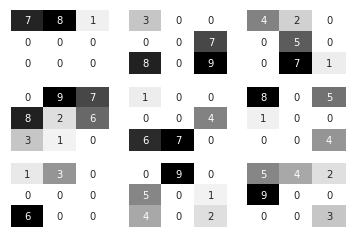

In [18]:
sudoku.plot(np.load('puzzle.npy'))

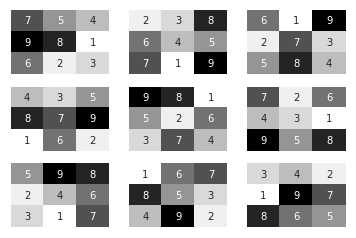

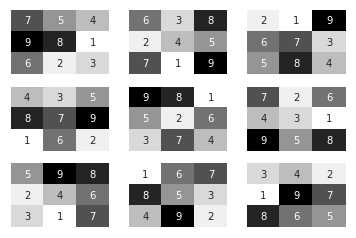

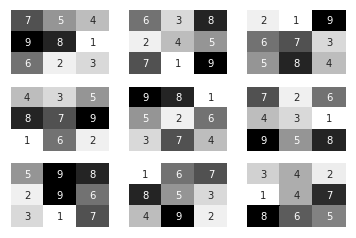

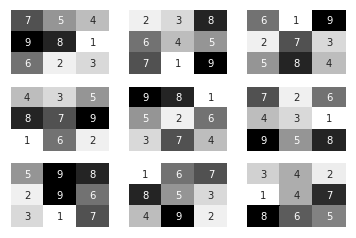

In [63]:
sudoku.plot_solutions()